# **Crop Yield Prediction Using Machine Learning**  

## **Project Overview**  
This project focuses on predicting **crop yield (tons per hectare)** using machine learning models based on **environmental, soil, and vegetation parameters**. The goal is to help **farmers, agronomists, and researchers** make data-driven decisions to optimize crop production.  

## **Machine Learning Models Used**  
The project includes two models for comparison:  

### **Random Forest Regressor**  
- A **tree-based ensemble learning algorithm**.  
- Reduces **overfitting** and captures **complex relationships** between variables.  
- Works well with **non-linear data** and large datasets.  

### **Gradient Boosting Regressor**  
- A **boosting-based model** that sequentially corrects previous prediction errors.  
- Highly accurate for **structured data**.  
- Often outperforms other models in **agricultural forecasting**.  




# **Energy Consumption Analysis Using CodeCarbon**  

## **Why Use CodeCarbon?**  
Machine learning models consume significant **computational resources**, leading to **energy consumption** and **carbon emissions**. CodeCarbon helps:  
✅ Track and **measure** the energy consumed during model training.  
✅ Estimate **carbon footprint** based on hardware and power usage.  
✅ Provide insights to **optimize ML models** for efficiency.  

## **Tracked Energy Metrics**  
The following parameters are recorded to analyze energy efficiency:  

| **Metric**         | **Description** |
|-------------------|----------------|
| `timestamp`       | The time when energy measurement was recorded. |
| `duration`        | The total execution time of the ML training process. |
| `emissions`       | The **total CO₂ emissions (kgCO₂e)** generated. |
| `emissions_rate`  | The rate of emissions per second (kgCO₂e/sec). |
| `cpu_power`       | The power consumed by the **CPU** (Watt). |
| `cpu_energy`      | The **energy usage of CPU** during training (kWh). |
| `ram_energy`      | The **energy used by RAM** (kWh). |
| `energy_consumed` | The **total energy** consumed by the system (kWh). |

## **Comparison Between Models**  
By tracking these metrics, we can compare:  
- **Random Forest vs. Gradient Boosting** in terms of energy consumption.  
- The **trade-off** between **model accuracy** and **carbon footprint**.  
- How **hyperparameter tuning** affects power usage.  

## **Key Findings & Optimization**  
- **If one model consumes less energy** while maintaining high accuracy, it’s preferable for sustainable AI.  
- **Reducing dataset size** and **early stopping** can minimize emissions.  
- Optimizing **CPU vs. GPU usage** can impact energy efficiency.  

By integrating **CodeCarbon**, this project aims to make **crop yield prediction** not only accurate but also **energy-efficient**! 🌍⚡  


[codecarbon INFO @ 12:03:38] [setup] RAM Tracking...
[codecarbon INFO @ 12:03:38] [setup] CPU Tracking...
[codecarbon WARNING @ 12:03:39] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 12:03:39] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 12:03:39] [setup] GPU Tracking...
[codecarbon INFO @ 12:03:39] No GPU found.
[codecarbon INFO @ 12:03:39] >>> Tracker's metadata:
[codecarbon INFO @ 12:03:39]   Platform system: macOS-15.0.1-arm64-arm-64bit
[codecarbon INFO @ 12:03:39]   Python version: 3.11.8
[codecarbon INFO @ 12:03:39]   CodeCarbon version: 2.8.3
[codecarbon INFO @ 12:03:39]   Available RAM : 8.000 GB
[codecarbon INFO @ 12:03:39]   CPU count: 8
[codecarbon INFO @ 12:03:39]   CPU model: Apple M1
[codecarbon INFO @ 12:03:39]   GPU count: None
[codecarbon INFO @ 12:03:39]   GPU model: None
[codecarbon INFO @ 12:03:42] Saving emissions data to 

Mean Squared Error for Random Forest Model: 6.284462745017661
R-squared Score for Random Forest Model: 0.999779364600953


[codecarbon WARNING @ 12:03:44] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 12:03:44] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 12:03:44] [setup] GPU Tracking...
[codecarbon INFO @ 12:03:44] No GPU found.
[codecarbon INFO @ 12:03:44] >>> Tracker's metadata:
[codecarbon INFO @ 12:03:44]   Platform system: macOS-15.0.1-arm64-arm-64bit
[codecarbon INFO @ 12:03:44]   Python version: 3.11.8
[codecarbon INFO @ 12:03:44]   CodeCarbon version: 2.8.3
[codecarbon INFO @ 12:03:44]   Available RAM : 8.000 GB
[codecarbon INFO @ 12:03:44]   CPU count: 8
[codecarbon INFO @ 12:03:44]   CPU model: Apple M1
[codecarbon INFO @ 12:03:44]   GPU count: None
[codecarbon INFO @ 12:03:44]   GPU model: None
[codecarbon INFO @ 12:03:46] Saving emissions data to file /Users/utkarshvashistha/Desktop/MISC/CERN-HSF/Cost_Estimation/emissions.csv
[codecarbon INFO @ 12:03:

Mean Squared Error for Gradient Boosting Model: 4.166447218415245
R-squared Score for Gradient Boosting Model: 0.9998537240521678


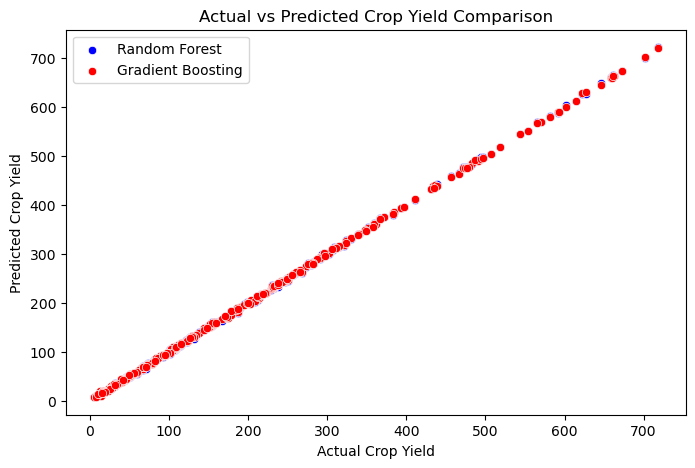

timestamp
0    2025-03-19T12:03:44
1    2025-03-19T12:03:47
Name: timestamp, dtype: object 

duration
0   1.514435291057453
1   1.467063999967650
Name: duration, dtype: float64 

emissions
0   0.000002399623321
1   0.000002324715649
Name: emissions, dtype: float64 

emissions_rate
0   0.000001584500397
1   0.000001584604114
Name: emissions_rate, dtype: float64 

cpu_power
0   5.000000000000000
1   5.000000000000000
Name: cpu_power, dtype: float64 

cpu_energy
0   0.000002102505092
1   0.000002036801504
Name: cpu_energy, dtype: float64 

ram_energy
0   0.000001260945173
1   0.000001221653854
Name: ram_energy, dtype: float64 

energy_consumed
0   0.000003363450265
1   0.000003258455358
Name: energy_consumed, dtype: float64 



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import codecarbon



df = pd.read_csv("crop_yield_advanced.csv")

features = ["temperature", "rainfall", "humidity", "soil_pH", "NDVI", "EVI", "SAVI", "LAI", "GDD", "Temp_Humidity", "Rainfall_NDVI", "Vegetation_Index", "season"]
target = "crop_yield"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize CodeCarbon tracker1 for Random Forest
tracker1 = codecarbon.EmissionsTracker()
tracker1.start()

# Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)


tracker1.stop()

print(f"Mean Squared Error for Random Forest Model: {rf_mse}")
print(f"R-squared Score for Random Forest Model: {rf_r2}")



# Initialize CodeCarbon tracker2 for Gradient Boosting Regressor
tracker2 = codecarbon.EmissionsTracker()
tracker2.start()

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)


print(f"Mean Squared Error for Gradient Boosting Model: {gb_mse}")
print(f"R-squared Score for Gradient Boosting Model: {gb_r2}")



tracker2.stop()


plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=rf_pred, label='Random Forest', color='blue')
sns.scatterplot(x=y_test, y=gb_pred, label='Gradient Boosting', color='red')
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Actual vs Predicted Crop Yield Comparison")
plt.legend()
plt.show()

#EmissionsTracker_CodeCarbon information
file_path = "/Users/utkarshvashistha/Desktop/MISC/CERN-HSF/Cost_Estimation/emissions.csv"
df = pd.read_csv(file_path)
pd.options.display.float_format = "{:.15f}".format  

l=["timestamp","duration","emissions","emissions_rate","cpu_power","cpu_energy","ram_energy","energy_consumed"]
for column in df.columns:
    if column in l:
        print(column)
        print(df[column], "\n")  
